<a href="https://colab.research.google.com/github/dylan-brackett/ml-projects/blob/master/deep_learning_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, RNN, LSTMCell, Dense, Dropout, LSTM
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd

from google.colab import files
import io

In [3]:
# Go to yahoo finance, pick a stock -> Historical Data -> Set Time Period = Max -> Apply -> Download
csv_file = files.upload()

Saving AMPE.csv to AMPE.csv


In [37]:
# In csv_file[] put the name of the file you uploaded
data = pd.read_csv(io.BytesIO(csv_file['AMPE.csv']))
data = data.drop(['Date'], 1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,3.00,3.75,3.00,3.50,3.50,13700
1,3.75,4.50,3.75,4.50,4.50,16200
2,4.49,4.49,3.75,3.75,3.75,700
3,4.00,4.25,4.00,4.25,4.25,1000
4,4.25,4.25,4.15,4.15,4.15,2300


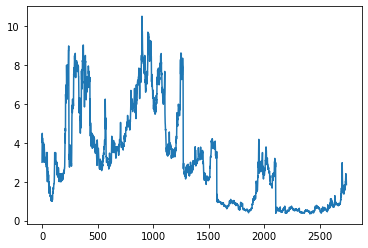

In [38]:
plt.plot(data['Open'])

In [39]:
rows = data.shape[0]
cols = data.shape[1]
data = data.values

In [40]:
train_start = 0
train_end = int(np.floor(0.8*rows))
test_start = train_end
test_end = rows
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [41]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

scalerX = MinMaxScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.fit_transform(X_test)

scalerY = MinMaxScaler()
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

In [42]:
# Open price is the the y/label

X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

In [43]:
print(X_train.shape)
print(y_train.shape)
y_train
# Placeholders are for tf1 not tf2
# X = tf.placeholder(dtype=tf.float32, shape=[None, 5])
# Y = tf.placeholder(dtype=tf.float32, shape=[None])

(2193, 1, 5)
(2193, 1, 1)


array([[[0.2591133 ]],

       [[0.33300493]],

       [[0.40591133]],

       ...,

       [[0.01773399]],

       [[0.01773399]],

       [[0.        ]]])

In [44]:
sequence_length = X_train.shape[0]
n_features = X_train.shape[1]
print(sequence_length)
print(n_features)

model = tf.keras.Sequential([
  Bidirectional(LSTM(256, return_sequences=True), input_shape=(1, 5)),
  Bidirectional(LSTM(256, return_sequences=True), input_shape=(1, 5)),
  Bidirectional(LSTM(256, return_sequences=False), input_shape=(1, 5)),
  Dropout(0.3),
  Dense(1, activation='linear')
])
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error"], optimizer='rmsprop')

2193
1


In [45]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/10
69/69 [==============================] - 9s 34ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.0478 - val_mean_absolute_error: 0.0478
Epoch 2/10
69/69 [==============================] - 1s 12ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113
Epoch 3/10
69/69 [==============================] - 1s 12ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 4/10
69/69 [==============================] - 1s 13ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 5/10
69/69 [==============================] - 1s 13ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 6/10
69/69 [==============================] - 1s 13ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0364 - val_mean_absolute_error: 0.0364
Epoch 7/10
69/69 [====

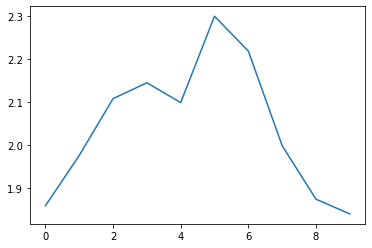

In [46]:
predictVals = scalerY.inverse_transform(model.predict(X_test[-10:]))
plt.plot(predictVals)